## ANÁLISE EXPLORATORIA DOS DADOS

<h1 style="font-size:30px;"> Reconhecimento Visual de Tipos de Plástico</h1>

<h2> Classificação dos tipos de plástico</h2>

<h3>Origem dos dados:</h3>


Os dados estão integralmente disponíveis no Kaggle através <a href="https://www.kaggle.com/datasets/remnazkarart/plastic-classification-dataset">deste link</a>


## Índice
* [1 Carregue o conjunto de dados Plastic Classification](#1-Carregue-o-conjunto-de-dados-plastic-types)
* [2 Pré-processamento de conjuntos de dados](#2-Pré-processamento-de-conjuntos-de-dados)
* [3 Arquitetura do Modelo](#3-Arquitetura-do-Modelo)
* [4 Implementação do Modelo](#4-Implementação-do-Modelo)
* [5 Avaliação do Modelo](#5-Avaliação-do-Modelo)
* [6 Conclusão](#6-Conclusão)

# 0 Importação e Instalação das Bibliotecas

## 0.1 Instalação das bibliotecas

In [1]:
#!pip install opendatasets
#!pip install pandas
#!pip install imagehash
#!pip install tensorflow

## 0.2 Importação das bibliotecas

In [9]:
import numpy as np
import pandas as pd
import os
import random

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib
import seaborn as sns
from PIL import Image
import imagehash
from collections import defaultdict

In [4]:
import cv2

In [5]:
import tensorflow
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    img_to_array,
    load_img,
)
from PIL import Image, UnidentifiedImageError


tensorflow.__version__

'2.17.0'

In [6]:

from glob import glob
from pathlib import Path
import os
import shutil

In [7]:
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["image.cmap"] = "gray"

In [10]:
SEED_VALUE = 42

# Corrigir semente para tornar o treinamento determinístico.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

# 1 Exploração de conjuntos de dados

In [11]:
# carregar as imagens
dataset = r"../data/Plastic_Classification/"

In [12]:
pasta_test = os.path.join(dataset, "test")
pasta_train = os.path.join(dataset, "train")
pasta_validation = os.path.join(dataset, "validation")

## 1.1 - Numero de classes 

In [15]:
# determinar o numero de classes
numero_de_classes_test = len(os.listdir(pasta_test))
numero_de_classes_train = len(os.listdir(pasta_train))
numero_de_classes_validation = len(os.listdir(pasta_validation))

In [18]:
 print(f"\n📁 Número de classes na Pasta test: ",numero_de_classes_test )
 print(f"\n📁 Número de classes na Pasta train: ",numero_de_classes_train )
 print(f"\n📁 Número de classes na Pasta validation: ",numero_de_classes_validation )


📁 Número de classes na Pasta test:  7

📁 Número de classes na Pasta train:  7

📁 Número de classes na Pasta validation:  7


## 1.2 Plotar algumas imagens para verificar a leitura do dataset

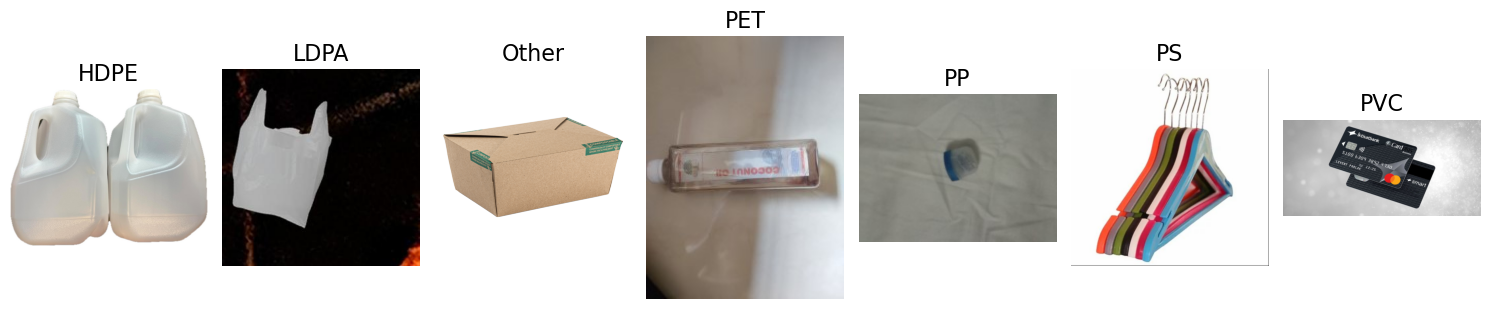

In [29]:
# Caminho das subpastas (cada uma é uma classe)
base_dir = '../data/Plastic_Classification/test/'
classes = os.listdir(base_dir)

# Mostrar 1 imagem aleatória por classe
plt.figure(figsize=(15, 6))

for i, plastic_class in enumerate(classes):
    class_path = os.path.join(base_dir, plastic_class)
    img_file = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_file)

    img = mpimg.imread(img_path)
    plt.subplot(1, 7, i+1)
    plt.imshow(img)
    plt.title(plastic_class)
    plt.axis('off')

plt.tight_layout()
plt.show()

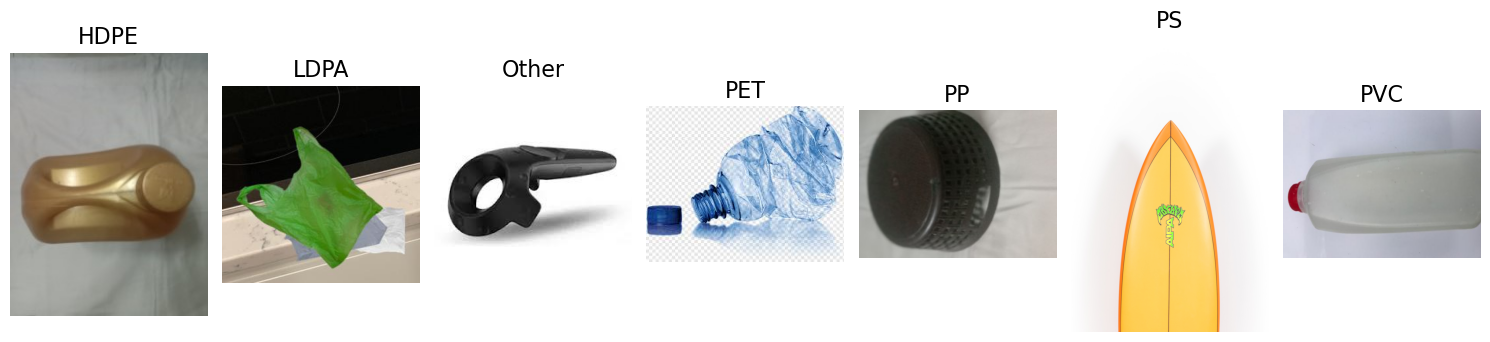

In [30]:
# Caminho das subpastas (cada uma é uma classe)
base_dir = '../data/Plastic_Classification/train/'
classes = os.listdir(base_dir)

# Mostrar 1 imagem aleatória por classe
plt.figure(figsize=(15, 6))

for i, plastic_class in enumerate(classes):
    class_path = os.path.join(base_dir, plastic_class)
    img_file = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_file)

    img = mpimg.imread(img_path)
    plt.subplot(1, 7, i+1)
    plt.imshow(img)
    plt.title(plastic_class)
    plt.axis('off')

plt.tight_layout()
plt.show()

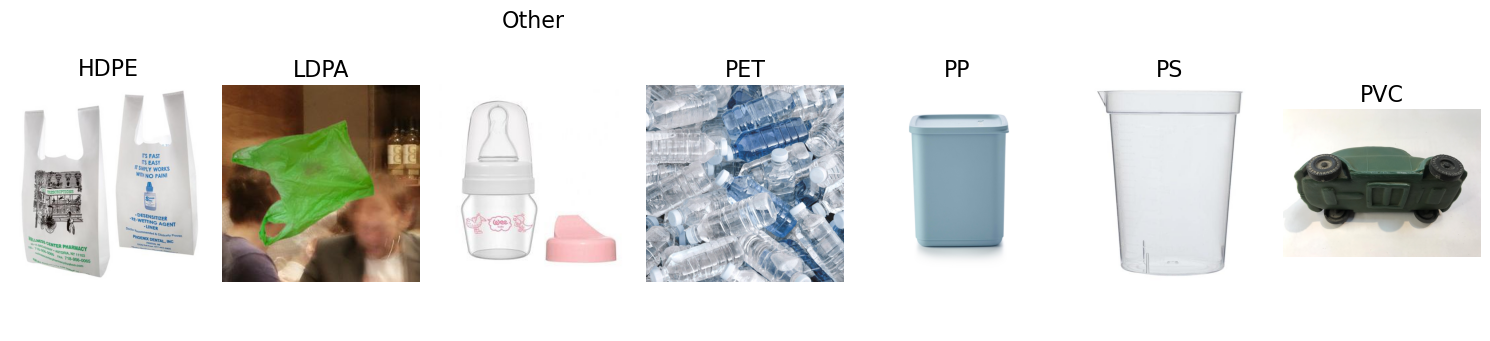

In [31]:
# Caminho das subpastas (cada uma é uma classe)
base_dir = '../data/Plastic_Classification/validation/'
classes = os.listdir(base_dir)

# Mostrar 1 imagem aleatória por classe
plt.figure(figsize=(15, 6))

for i, plastic_class in enumerate(classes):
    class_path = os.path.join(base_dir, plastic_class)
    img_file = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_file)

    img = mpimg.imread(img_path)
    plt.subplot(1, 7, i+1)
    plt.imshow(img)
    plt.title(plastic_class)
    plt.axis('off')

plt.tight_layout()
plt.show()

## 1.3 Verificar a quantidade de Imagens em cada conjunto test, train, validation

In [19]:
dataset = "../data/Plastic_Classification"

# Define os caminhos para cada conjunto
pasta_train = os.path.join(dataset, "train")
pasta_test = os.path.join(dataset, "test")
pasta_validation = os.path.join(dataset, "validation")


# Função para listar classes e contar imagens
def contar_imagens_por_classe(pasta_base):
    print(f"\n📁 Pasta: {pasta_base}")
    total_imagens = 0

    # Lista apenas subpastas válidas (classes)
    classes = [
        c for c in os.listdir(pasta_base) if os.path.isdir(os.path.join(pasta_base, c))
    ]

    for classe in sorted(classes):
        caminho_classe = os.path.join(pasta_base, classe)

        # Lista arquivos de imagem válidos
        imagens = [
            f
            for f in os.listdir(caminho_classe)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        ]
        qtd = len(imagens)
        total_imagens += qtd

        print(f"🧪 Classe '{classe}': {qtd} imagens")

    print(f"📊 Total de imagens em '{os.path.basename(pasta_base)}': {total_imagens}")


# Executa para cada pasta
contar_imagens_por_classe(pasta_train)
contar_imagens_por_classe(pasta_test)
contar_imagens_por_classe(pasta_validation)



📁 Pasta: ../data/Plastic_Classification\train
🧪 Classe 'HDPE': 208 imagens
🧪 Classe 'LDPA': 210 imagens
🧪 Classe 'Other': 171 imagens
🧪 Classe 'PET': 208 imagens
🧪 Classe 'PP': 209 imagens
🧪 Classe 'PS': 71 imagens
🧪 Classe 'PVC': 193 imagens
📊 Total de imagens em 'train': 1270

📁 Pasta: ../data/Plastic_Classification\test
🧪 Classe 'HDPE': 30 imagens
🧪 Classe 'LDPA': 30 imagens
🧪 Classe 'Other': 26 imagens
🧪 Classe 'PET': 30 imagens
🧪 Classe 'PP': 30 imagens
🧪 Classe 'PS': 15 imagens
🧪 Classe 'PVC': 26 imagens
📊 Total de imagens em 'test': 187

📁 Pasta: ../data/Plastic_Classification\validation
🧪 Classe 'HDPE': 58 imagens
🧪 Classe 'LDPA': 60 imagens
🧪 Classe 'Other': 51 imagens
🧪 Classe 'PET': 56 imagens
🧪 Classe 'PP': 59 imagens
🧪 Classe 'PS': 18 imagens
🧪 Classe 'PVC': 52 imagens
📊 Total de imagens em 'validation': 354


## 1.3 Criação do dataFrame inicial

In [22]:
# criando um novo dataset
dataset = "../data/Plastic_Classification"

pastas = {
    "train": os.path.join(dataset, "train"),
    "test": os.path.join(dataset, "test"),
    "validation": os.path.join(dataset, "validation"),
}

# Lista onde vamos armazenar os dados
dados = []


# Função para obter as informações de cada imagem
def coletar_dados(pasta_base, nome_conjunto):
    classes = [
        c for c in os.listdir(pasta_base) if os.path.isdir(os.path.join(pasta_base, c))
    ]

    for classe in sorted(classes):
        caminho_classe = os.path.join(pasta_base, classe)

        for nome_arquivo in os.listdir(caminho_classe):
            if nome_arquivo.lower().endswith(
                (".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".webp", ".jfif", ".avif")
            ):
                caminho_imagem = os.path.join(caminho_classe, nome_arquivo)

                try:
                    with Image.open(caminho_imagem) as img:
                        largura, altura = img.size
                except:
                    largura, altura = None, None  # erro ao abrir a imagem

                _, extensao = os.path.splitext(nome_arquivo)

                dados.append(
                    {
                        "conjunto": nome_conjunto,
                        "classe": classe,
                        "arquivo": nome_arquivo,
                        "largura": largura,
                        "altura": altura,
                        "extensao": extensao.lower(),
                    }
                )


# Coleta os dados de cada pasta
for nome_conjunto, caminho in pastas.items():
    coletar_dados(caminho, nome_conjunto)

# Cria DataFrame
df = pd.DataFrame(dados)

# Visualiza as primeiras linhas
print(df.head())

# Salva em CSV
df.to_csv("01-data_inicial.csv", index=False)
print("\n📁 Arquivo '01-data_inicial.csv' salvo com sucesso!")


C:\Users\graci.DESKTOP-I7T8UK6\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


  conjunto classe        arquivo  largura  altura extensao
0    train   HDPE    image_1.jpg   1280.0  1280.0     .jpg
1    train   HDPE   image_10.jpg   1280.0  1280.0     .jpg
2    train   HDPE  image_100.jpg    192.0   256.0     .jpg
3    train   HDPE  image_101.jpg    256.0   192.0     .jpg
4    train   HDPE  image_102.jpg    256.0   192.0     .jpg

📁 Arquivo '01-data_inicial.csv' salvo com sucesso!


## 1.4 Verificar as extensões das imagens

In [23]:
df["extensao"].unique()

array(['.jpg', '.jpeg', '.png', '.webp', '.jfif', '.avif'], dtype=object)

In [25]:
df["extensao"].value_counts()

extensao
.jpg     1569
.jpeg     201
.jfif     185
.webp     103
.png       41
.avif       1
Name: count, dtype: int64

In [26]:
df["extensao"].nunique()

6

In [27]:
print("Extensões únicas:", df["extensao"].unique())
print("Número de extensões distintas:", df["extensao"].nunique())
print("Imagens há por extensão:",df["extensao"].value_counts())

Extensões únicas: ['.jpg' '.jpeg' '.png' '.webp' '.jfif' '.avif']
Número de extensões distintas: 6
Imagens há por extensão: extensao
.jpg     1569
.jpeg     201
.jfif     185
.webp     103
.png       41
.avif       1
Name: count, dtype: int64


In [ ]:
# graficos das extensões das imagens

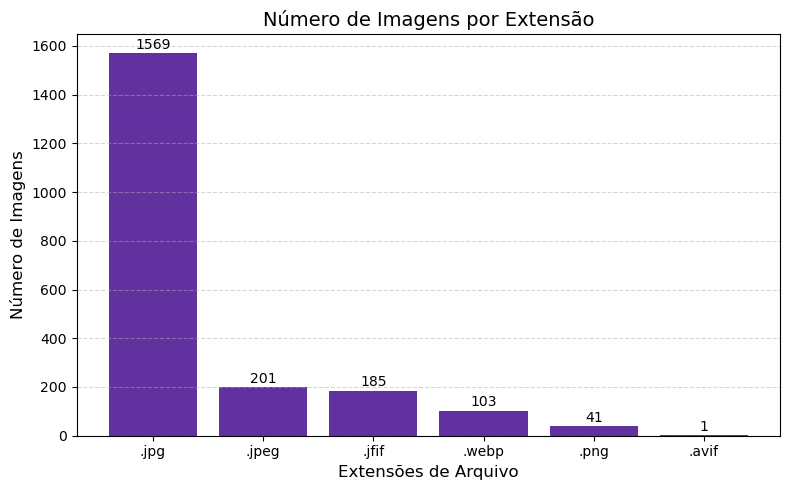

In [36]:
extensoes = df["extensao"].value_counts()

# Preparar dados
extensoes_ordenadas = dict(sorted(extensoes.items(), key=lambda x: x[1], reverse=True))
ext_labels = list(extensoes_ordenadas.keys())
ext_values = list(extensoes_ordenadas.values())

# Plotar gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(ext_labels, ext_values, color="#61319f")

# Adicionar rótulos de valor no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5, f'{height}', ha='center', va='bottom', fontsize=10)

# Estilização
plt.title("Número de Imagens por Extensão", fontsize=14)
plt.xlabel("Extensões de Arquivo", fontsize=12)
plt.ylabel("Número de Imagens", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


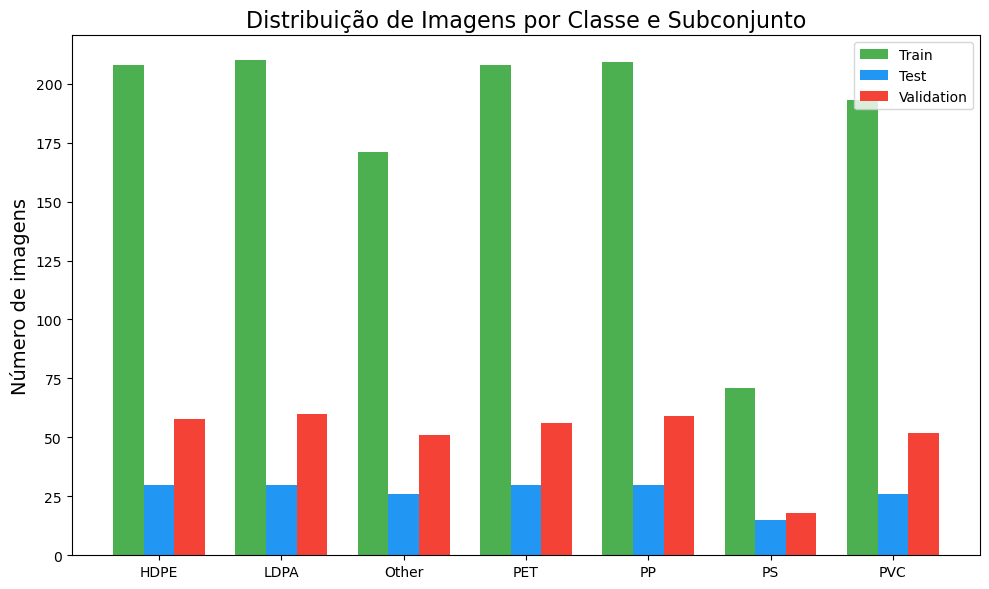

In [37]:
# Dados por conjunto
classes = ['HDPE', 'LDPA', 'Other', 'PET', 'PP', 'PS', 'PVC']
train = [208, 210, 171, 208, 209, 71, 193]
test = [30, 30, 26, 30, 30, 15, 26]
val = [58, 60, 51, 56, 59, 18, 52]

x = range(len(classes))
plt.figure(figsize=(10, 6))
plt.bar(x, train, width=0.25, label='Train', color='#4caf50')
plt.bar([i + 0.25 for i in x], test, width=0.25, label='Test', color='#2196f3')
plt.bar([i + 0.50 for i in x], val, width=0.25, label='Validation', color='#f44336')
plt.xticks([i + 0.25 for i in x], classes)
plt.ylabel("Número de imagens")
plt.title("Distribuição de Imagens por Classe e Subconjunto")
plt.legend()
plt.tight_layout()
plt.show()

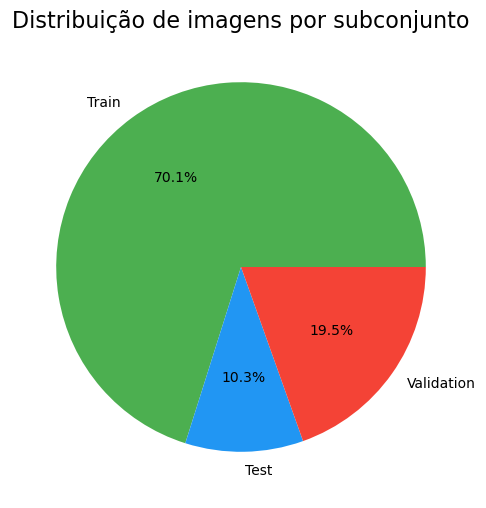

In [38]:
plt.figure(figsize=(6,6))
plt.pie([1270, 187, 354], labels=['Train', 'Test', 'Validation'], 
        autopct='%1.1f%%', colors=['#4caf50', '#2196f3', '#f44336'])
plt.title("Distribuição de imagens por subconjunto")
plt.show()

## 2 CONCLUSÃO

Será preciso realizar pre processamento das imagens para padronização e normalização para posterior realizar treinamento 